In [547]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [522]:
ds = pd.read_csv('Diversity.csv',encoding='latin1')
pr = pd.read_csv('Poverty rate.csv', encoding='latin1') # using encoding to solve the error: 'utf-8' codec can't decode. 
pk = pd.read_csv('Police Killings.csv',encoding='latin1')
mi = pd.read_csv('Median income.csv',encoding='latin1')
hs = pd.read_csv('HS.csv',encoding='latin1')

In [419]:
ds.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [523]:
ds=ds.rename(columns={"Geographic area":"Geographic Area"})

In [421]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [422]:
pk.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [524]:
# change state to Geographic Area and change city to City to match with other tables.
pk = pk.rename(columns={"state":"Geographic Area"})
pk = pk.rename(columns={"city":"City"})

In [424]:
pk.head()

,id,name,date,manner_of_death,armed,age,gender,race,City,Geographic Area,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [425]:
mi.head()

,Geographic Area,City,Median Income
0,AZ,Stanfield CDP,4511
1,CA,Delft Colony CDP,6917
2,ND,Conway city,7083
3,AZ,Lower Santan Village CDP,7175
4,VA,Union Level CDP,8015


In [426]:
hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [427]:
print(len(ds))
print(len(mi))
print(len(pr))
print(len(hs))

29268
27385
29329
29329


In [428]:
# merge pr, mi, and hs

In [525]:
hs = hs.merge(pr, how="left", on=["Geographic Area", "City"])
hs = hs.merge(mi, how="left", on=["Geographic Area", "City"])
hs = hs.merge(ds, how="left", on=["Geographic Area", "City"])

In [526]:
hs.head()

,Geographic Area,City,percent_completed_hs,poverty_rate,Median Income,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,21.2,0.788,11207.0,0.672,0.302,0,0,0.016
1,AL,Abbeville city,69.1,0.291,25615.0,0.544,0.414,0.001,0.01,0.031
2,AL,Adamsville city,78.9,0.255,42575.0,0.523,0.449,0.005,0.003,0.023
3,AL,Addison town,81.4,0.307,37083.0,0.991,0.001,0,0.001,0.004
4,AL,Akron town,68.6,0.42,21667.0,0.132,0.865,0,0,0.003


In [527]:
hs.isnull().sum()

Geographic Area             0
City                        0
percent_completed_hs        0
poverty_rate                0
Median Income            1946
share_white               207
share_black               207
share_native_american     207
share_asian               207
share_hispanic            207
dtype: int64

In [528]:
# for convenience, i will just drop the null values
hs = hs.dropna()

In [529]:
hs.isnull().sum()

Geographic Area          0
City                     0
percent_completed_hs     0
poverty_rate             0
Median Income            0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

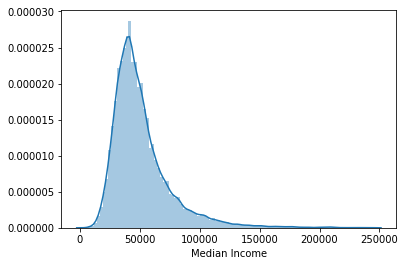

In [537]:
# the median income in the US is about 50,000. This is pretty close to the number from the internet-$53,657
sns.distplot(hs['Median Income'], bins=100)

/Users/michaelzeng/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/michaelzeng/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/michaelzeng/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)


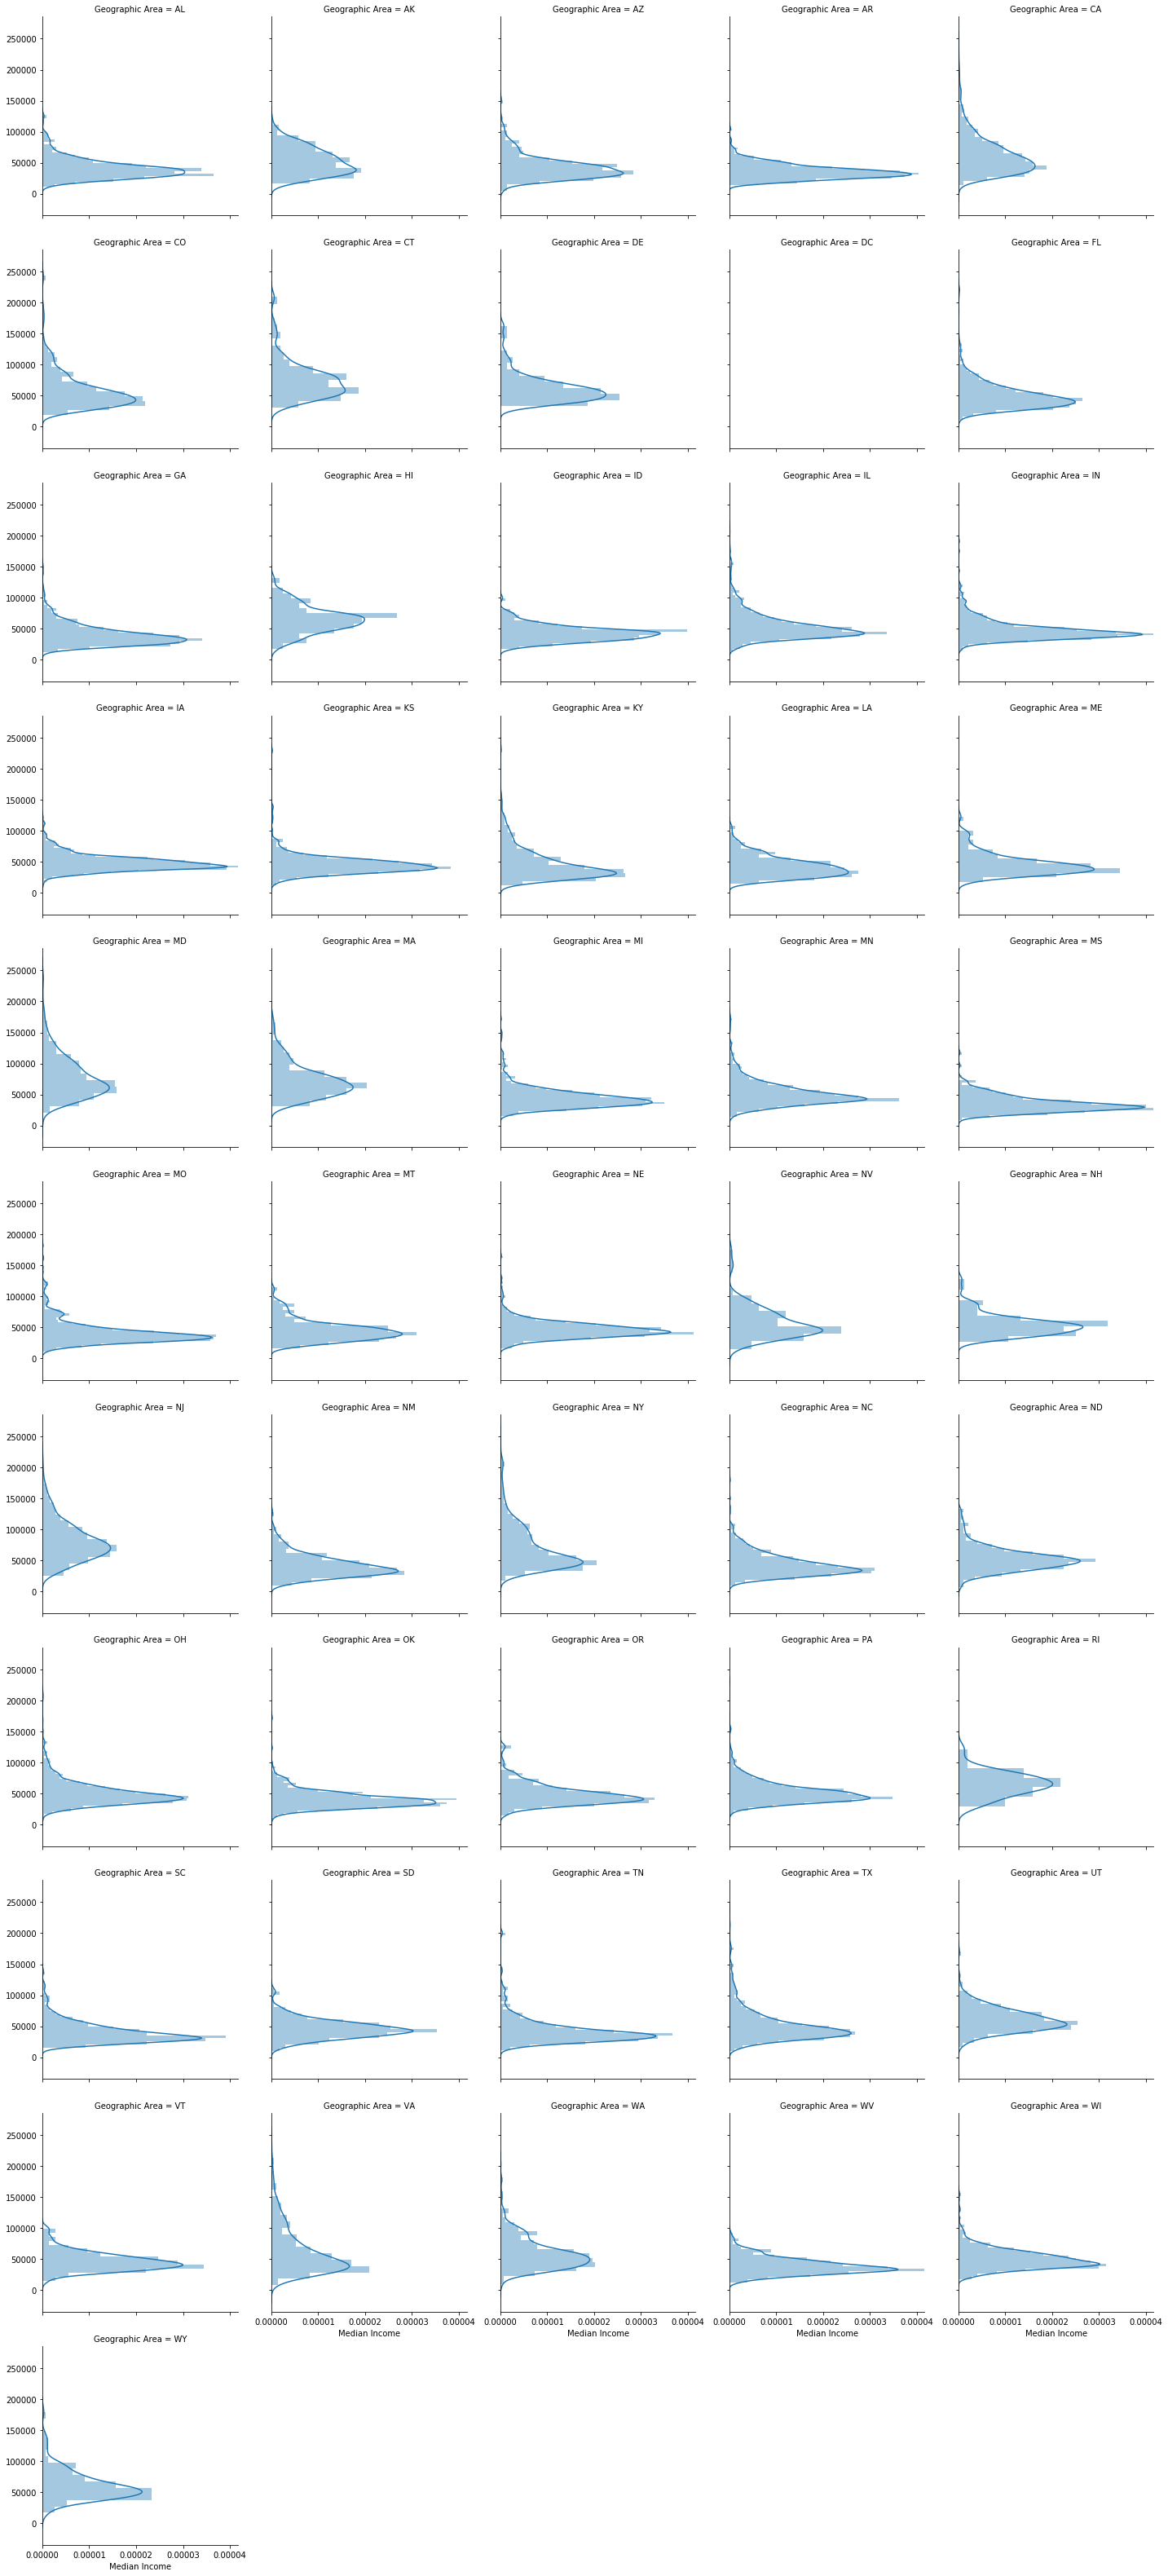

In [502]:
grid = sns.FacetGrid(hs, col="Geographic Area", col_wrap=5, size=4)
grid.map(sns.distplot, "Median Income", vertical=True)

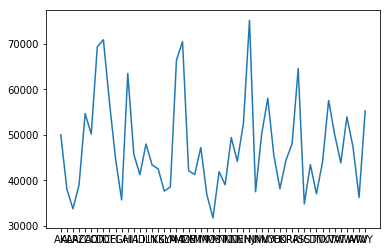

In [546]:
# 
plt.plot(hs.groupby('Geographic Area')["Median Income"].median())

In [ ]:
# convert str to float
hs['poverty_rate']=[float(x) for x in hs['poverty_rate']]

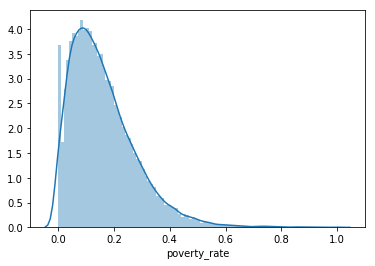

In [536]:
# the poverty rate in the US is 14.8%. So this is about the same
sns.distplot(hs['poverty_rate'], bins=100)

In [84]:
pk.groupby(["Geographic Area","City"])["name"].count()

Geographic Area  City           
AK               Anchorage          3
                 Barrow             1
                 Big Lake           1
                 Fairbanks          5
                 Houston            1
                 Kenai Peninsula    1
                 Spenard            1
                 Wasilla            2
AL               Abbeville          1
                 Arab               1
                 Ashville           1
                 Baldwin County     1
                 Bay Minette        1
                 Birmingham         3
                 Brooksville        1
                 Clanton            2
                 Clay               1
                 Dadeville          1
                 Deer Park          1
                 Eastaboga          1
                 Eufaula            1
                 Gadsden            1
                 Homewood           2
                 Hoover             1
                 Huntsville         4
                 